# Prepare for Programming and Analysis

Import the following useful libraries: 
 - Pandas 
 - NumPy 
 - Matplot Library

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Verify Pandas and NumPy versions:

In [5]:
print(pd.__version__)

1.4.4


In [6]:
print(np.__version__)

1.21.5


Import CSV as Pandas dataframe: 

In [7]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

View a sample of the dataframe:  

In [8]:
print(df.head(3))

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  


# Clean the Data

We only want to view data for the United States. So remove all rows of data for countries other than the United States: 

In [9]:
df1 = df[~(df['Country'] == "United States of America")].index 
df.drop(df1, inplace = True)
print(df)

       Date_reported Country_code                   Country WHO_region  \
289280    2020-01-03           US  United States of America       AMRO   
289281    2020-01-04           US  United States of America       AMRO   
289282    2020-01-05           US  United States of America       AMRO   
289283    2020-01-06           US  United States of America       AMRO   
289284    2020-01-07           US  United States of America       AMRO   
...              ...          ...                       ...        ...   
290555    2023-07-01           US  United States of America       AMRO   
290556    2023-07-02           US  United States of America       AMRO   
290557    2023-07-03           US  United States of America       AMRO   
290558    2023-07-04           US  United States of America       AMRO   
290559    2023-07-05           US  United States of America       AMRO   

        New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
289280          0                 0       

Check for duplicate rows and remove those duplicates: 

In [10]:
duplicateRows = df[df.duplicated()]

In [11]:
print(duplicateRows)

Empty DataFrame
Columns: [Date_reported, Country_code, Country, WHO_region, New_cases, Cumulative_cases, New_deaths, Cumulative_deaths]
Index: []


Since we are only looking at data for the United States, remove the "WHO_region", "Country", and "Country_code" columns as these are not providing us any additional relevant information: 

In [12]:
df.drop(columns=["WHO_region", "Country", "Country_code"], inplace=True)

Remove any rows where the value for "New_deaths", "New_cases", "Cumulative_cases", or "Cumulative_deaths" are less than 0, as these are invalid values for cells in those columns:

In [13]:
df2 = df[(df['New_deaths'] < 0)].index 
df.drop(df2, inplace = True)

In [14]:
df3 = df[(df['New_cases'] < 0)].index
df.drop(df3, inplace = True)

In [15]:
df4 = df[(df['Cumulative_cases'] < 0)].index
df.drop(df3, inplace = True)

In [16]:
df5 = df[(df['Cumulative_deaths'] < 0)].index
df.drop(df3, inplace = True)

Take another glance at the data and the dataframe now that we have cleaned the dataframe some:

In [17]:
df

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
289280,2020-01-03,0,0,0,0
289281,2020-01-04,0,0,0,0
289282,2020-01-05,0,0,0,0
289283,2020-01-06,0,0,0,0
289284,2020-01-07,0,0,0,0
...,...,...,...,...,...
290555,2023-07-01,0,103436829,0,1127152
290556,2023-07-02,0,103436829,0,1127152
290557,2023-07-03,0,103436829,0,1127152
290558,2023-07-04,0,103436829,0,1127152


In [18]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.279000e+03,1.279000e+03,1279.000000,1.279000e+03
mean,8.082554e+04,5.093151e+07,883.181392,6.584915e+05
std,1.239478e+05,3.827014e+07,945.127048,3.889450e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,9.817000e+03,1.130359e+07,72.000000,2.534440e+05
50%,4.532900e+04,4.334074e+07,631.000000,7.025770e+05
75%,1.069270e+05,9.217737e+07,1317.000000,1.030645e+06
max,1.265520e+06,1.034368e+08,5061.000000,1.127152e+06


Make sure the "Date_reported" values are all formatted as dates:

In [19]:
df["Date_reported"] = pd.to_datetime(df["Date_reported"])

# Visualize the Data

First, plot the daily number of new COVID cases between January 2020 and July 2023:

In [26]:
date = df["Date_reported"]
new_cases = df["New_cases"]

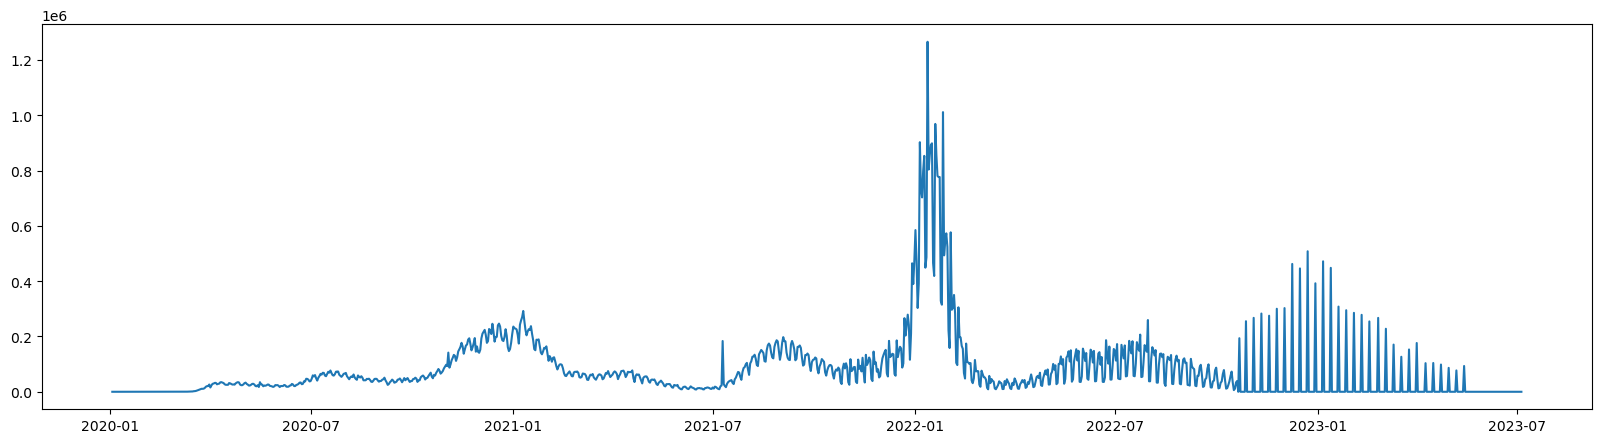

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(date, new_cases);

Next, plot the daily number of new COVID deaths between January 2020 and July 2023:

In [28]:
new_deaths = df["New_deaths"]

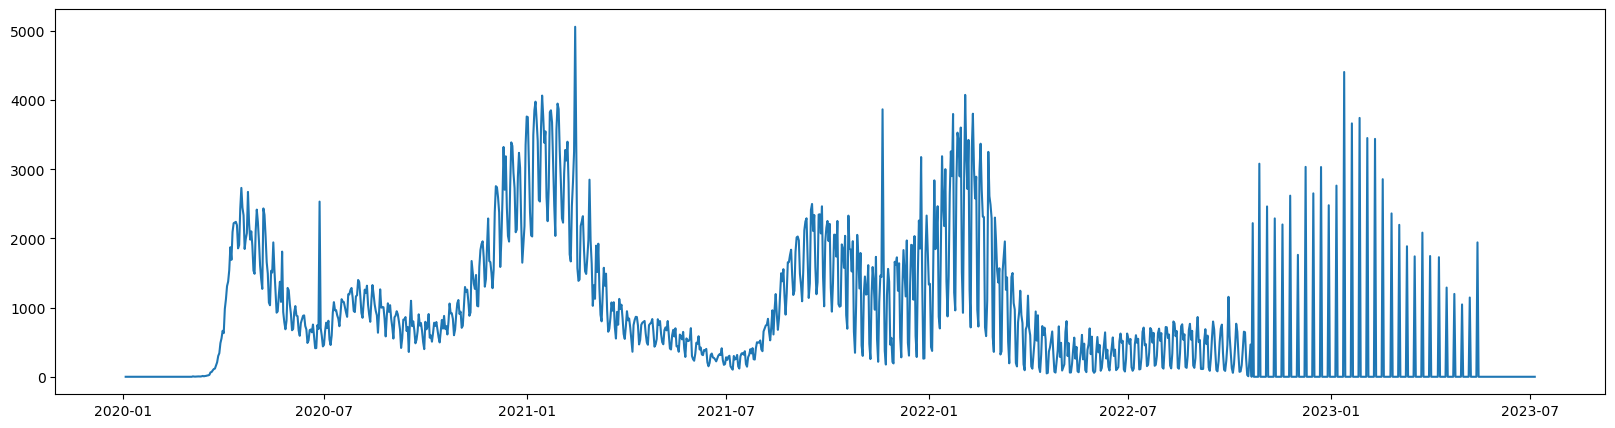

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(date, new_deaths);

# Interpret the Visualized Data

We can see that over the past few years, there have been periods of weeks or months where daily case counts and death counts have either risen or fallen substantially. Usually the case and death counts rise and fall together. 